In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [308]:
#import all CSV files 
df0V1 = pd.read_csv("/Users/idan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Solo Project-Idan’s MacBook Pro/Idan-xytests/0V1.csv", low_memory=False)
df0V2 = pd.read_csv("/Users/idan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Solo Project-Idan’s MacBook Pro/Idan-xytests/0V2.csv", low_memory=False)
df0V3 = pd.read_csv("/Users/idan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Solo Project-Idan’s MacBook Pro/Idan-xytests/0V3.csv", low_memory=False)
df0V1.head()

#remove uneccessary data 
df0V1 = df0V1.iloc[:, [0, 4, 8]]
df0V2 = df0V2.iloc[:, [0, 4, 8]]
df0V3 = df0V3.iloc[:, [0, 4, 8]]

df0V1.head()

,Time (sec),VelCmd (Y) (mm/sec),CurFbk (Y)
0,0.00,0.0,0.011237
1,0.01,0.0,0.009413
2,0.02,0.0,0.005491
3,0.03,0.0,0.004445
4,0.04,0.0,0.005224


In [152]:
df0V1 = df0V1.loc[df0V1.iloc[:, 1] == 20]
df0V1.reset_index(drop=True, inplace=True)

df0V1.rename(columns={ df0V1.columns[0]: "Time" }, inplace = True)
df0V1.rename(columns={ df0V1.columns[1]: "speed" }, inplace = True)
df0V1.rename(columns={ df0V1.columns[2]: "current1" }, inplace = True)



df0V2 = df0V2.loc[df0V2.iloc[:, 1] == 20]
df0V2.reset_index(drop=True, inplace=True)

df0V2.rename(columns={ df0V2.columns[0]: "Time" }, inplace = True)
df0V2.rename(columns={ df0V2.columns[1]: "speed" }, inplace = True)
df0V2.rename(columns={ df0V2.columns[2]: "current2" }, inplace = True)

df0V3 = df0V3.loc[df0V3.iloc[:, 1] == 20]
df0V3.reset_index(drop=True, inplace=True)

df0V3.rename(columns={ df0V3.columns[0]: "Time" }, inplace = True)
df0V3.rename(columns={ df0V3.columns[1]: "speed" }, inplace = True)
df0V3.rename(columns={ df0V3.columns[2]: "current3" }, inplace = True)

df0V1.head()

,Time,speed,current1
0,1.48,20.0,0.061046
1,1.49,20.0,0.055027
2,1.50,20.0,0.058922
3,1.51,20.0,0.047145
4,1.52,20.0,0.044155


In [161]:
CurFbk = pd.concat([df0V1['current1'], df0V2['current2'], df0V3['current3']], axis = 1)

Average0V = CurFbk.iloc[:,0:2].mean(axis=1)
Average0V = Average0V.rolling(window=50).mean()
print(Average0V.max())

0.16740408346056943


<AxesSubplot:>

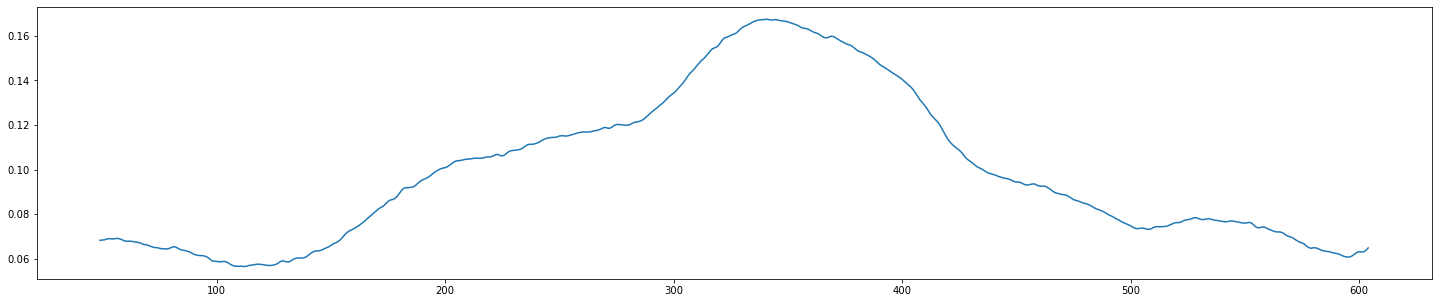

In [160]:
Average0V.plot(figsize=(25,5))


In [13]:
def plot(file1, file2, file3):
    path = "/Users/idan/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Solo Project-Idan’s MacBook Pro/Idan-xytests/"

    df1 = pd.read_csv(path+str(file1),low_memory=False)
    df2 = pd.read_csv(path+str(file2),low_memory=False)
    df3 = pd.read_csv(path+str(file3),low_memory=False)

    df1 = df1.iloc[:, [0, 4, 8]]
    df2 = df2.iloc[:, [0, 4, 8]]
    df3 = df3.iloc[:, [0, 4, 8]]

    df1.rename(columns={ df1.columns[0]: "Time" }, inplace = True)
    df1.rename(columns={ df1.columns[1]: "speed" }, inplace = True)
    df1.rename(columns={ df1.columns[2]: "current" }, inplace = True)

    df2.rename(columns={ df2.columns[0]: "Time" }, inplace = True)
    df2.rename(columns={ df2.columns[1]: "speed" }, inplace = True)
    df2.rename(columns={ df2.columns[2]: "current" }, inplace = True)

    df3.rename(columns={ df3.columns[0]: "Time" }, inplace = True)
    df3.rename(columns={ df3.columns[1]: "speed" }, inplace = True)
    df3.rename(columns={ df3.columns[2]: "current" }, inplace = True)

    df1 = df1[(df1['speed'] == 20)]*27
    df2 = df2[(df2['speed'] == 20)]*27
    df3 = df3[(df3['speed'] == 20)]*27

    df1.reset_index(drop=True, inplace=True)
    df2.reset_index(drop=True, inplace=True)
    df3.reset_index(drop=True, inplace=True)

    CurFbk = pd.concat([df1['current'], df2['current'], df3['current']], axis = 1)
    Average0V = CurFbk.iloc[:,0:2].mean(axis=1)
    Average0V = Average0V.rolling(window=50).mean()

    print(Average0V.max())

    #everysample the probe travels 0.2ms 

    plt.rcParams.update({'font.size': 20})
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'CMU Serif, Times New Roman'
    plt.rcParams["mathtext.fontset"] = "dejavuserif"

    graph = Average0V.plot(figsize=(15,5), y = "reactive force", label = file1[0:3], legend = True,  linewidth=3.0, zorder=10)
    graph.set_xlabel("Samples")
    graph.set_ylabel("Reactive Force (N)")
    graph.set_title("Shear Force Test")


4.519910253435374
5.101357676982879
6.146824205045887
7.574615370333194
9.459639577567579
11.208145418465138
12.768020972907543


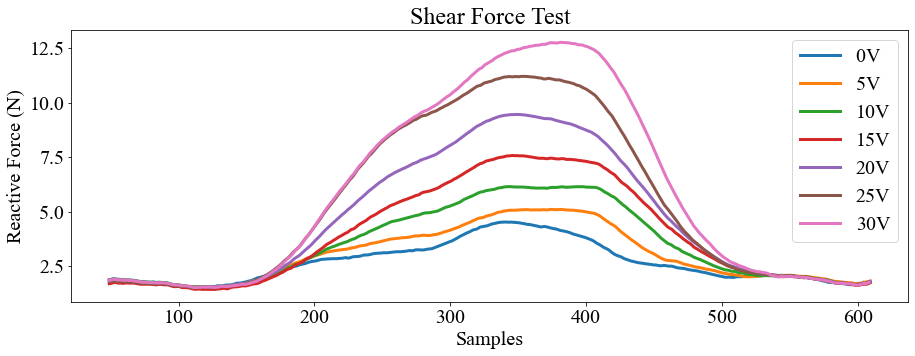

In [17]:
plot("0V 1.csv","0V 2.csv", "0V 3.csv")
plot("5V 1.csv","5V 2.csv", "5V 3.csv")
plot("10V1.csv","10V2.csv", "10V3.csv")
plot("15V1.csv","15V2.csv", "15V3.csv")
plot("20V1.csv","20V2.csv", "20V3.csv")
plot("25V1.csv","25V2.csv", "25V3.csv")
plot("30V1.csv","30V2.csv", "30V3.csv")

In [290]:
x = "bosss"
print(x[0:2])

bo


In [333]:
counter = 0
last_value = 0
index = 0

    
current = df0V1.iloc[:, 2]

print(len(current))

while counter < 2:
    for row in range(0, len(current)):
        # print(counter)
        # print(index)
        index += 1 
        if current[row] > last_value: 
            counter += 1
        else: 
            counter = 0
        last_value = current[row]

print(index)


1000
1000
